<a href="https://colab.research.google.com/github/skarot/MachineLearning/blob/main/CuisinePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study - Predict the cuisine based on ingredients

# Data Preparation and Understanding

## Import Libraries

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Download data

In [290]:
 recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")

 print("Data read into dataframe!") 

Data read into dataframe!


## Analyse data 

In [291]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [292]:
recipes.shape

(57691, 384)

In [293]:
recipes.describe()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,...,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691
unique,69,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,American,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
freq,40150,55362,57690,57467,57604,55258,57654,57065,57680,57678,...,57542,57319,55479,56957,56665,57658,57605,54289,56634,56584


In [294]:
recipes.value_counts() # frequency table

country   almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  armagnac  artemisia  artichoke  asparagus  avocado  bacon  baked_potato  balm  banana  barley  bartlett_pear  basil  bay  bean  beech  beef  beef_broth  beef_liver  beer  beet  bell_pepper  bergamot  berry  bitter_orange  black_bean  black_currant  black_mustard_seed_oil  black_pepper  black_raspberry  black_sesame_seed  black_tea  blackberry  blackberry_brandy  blue_cheese  blueberry  bone_oil  bourbon_whiskey  brandy  brassica  bread  broccoli  brown_rice  brussels_sprout  buckwheat  butter  buttermilk  cabbage  cabernet_sauvignon_wine  cacao  camembert_cheese  cane_molasses  caraway  cardamom  carnation  carob  carrot  cashew  cassava  catfish  cauliflower  caviar  cayenne  celery  celery_oil  cereal  chamomile  champagne_wine  chayote  cheddar_cheese  cheese  cherry  cherry_brandy  chervil  chicken  chicken_broth  chicken_liver  chickpea  chicory  chinese_cabbage  chive  cider  cilantro  cinnamon  citrus  

1.   Cuisine column is labeled as Country, which is inaccurate.
2.   Cuisine names are not consistent as not all of them start with an uppercase first letter.
3. Some cuisines are duplicated as variation of the country name, such as Vietnam and Vietnamese.
4.  Some cuisines have very few recipes.



In [295]:
recipes.rename(columns = {'country':'cuisine'}, inplace = True)

In [296]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [297]:
recipes['cuisine'] = recipes['cuisine'].str.lower()

In [298]:
recipes.loc[recipes["cuisine"] == 'china','cuisine'] = 'chinese'

In [299]:
recipes.loc[recipes['cuisine']=="china", 'cuisine']

Series([], Name: cuisine, dtype: object)

In [300]:
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "israeli"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

### Convert all 'yes' to 1 and 'no' to 0

In [301]:
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

In [302]:
recipes['no_of_ingredients'] =recipes.iloc[:,1:].sum(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


In [303]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini,no_of_ingredients
0,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


### Removing recipes with less than 5 ingredients

In [304]:
recipes = recipes[recipes['no_of_ingredients']>5]

In [305]:
recipes.shape

(44441, 385)

### Removing cuisines with less than 50 recipes

In [306]:
occurances = recipes.groupby(['cuisine']).size()

In [307]:
occurances = occurances.to_dict()

In [308]:
occurances

{'african': 107,
 'american': 30199,
 'asian': 1012,
 'austrian': 15,
 'bangladesh': 4,
 'belgian': 11,
 'cajun_creole': 135,
 'canadian': 577,
 'caribbean': 149,
 'central_southamerican': 193,
 'chinese': 377,
 'dutch': 17,
 'east-african': 6,
 'east_asian': 765,
 'eastern-europe': 191,
 'easterneuropean_russian': 125,
 'english_scottish': 153,
 'french': 941,
 'german': 232,
 'greek': 199,
 'indian': 500,
 'indonesian': 10,
 'iranian': 12,
 'israeli': 5,
 'italian': 2682,
 'japanese': 251,
 'jewish': 239,
 'korean': 643,
 'lebanese': 21,
 'malaysian': 16,
 'mediterranean': 240,
 'mexican': 2074,
 'middleeastern': 214,
 'moroccan': 124,
 'north-african': 53,
 'pakistani': 18,
 'philippine': 34,
 'scandinavian': 147,
 'south-african': 11,
 'south-america': 66,
 'southern_soulfood': 283,
 'southwestern': 99,
 'spanish_portuguese': 330,
 'swiss': 14,
 'thai': 269,
 'turkish': 12,
 'uk-and-irish': 258,
 'vietnamese': 84,
 'west-african': 10,
 'western': 314}

In [309]:
recipes_to_keep = [k for k,v in occurances.items() if v>50]


In [310]:
recipes_to_keep

['african',
 'american',
 'asian',
 'cajun_creole',
 'canadian',
 'caribbean',
 'central_southamerican',
 'chinese',
 'east_asian',
 'eastern-europe',
 'easterneuropean_russian',
 'english_scottish',
 'french',
 'german',
 'greek',
 'indian',
 'italian',
 'japanese',
 'jewish',
 'korean',
 'mediterranean',
 'mexican',
 'middleeastern',
 'moroccan',
 'north-african',
 'scandinavian',
 'south-america',
 'southern_soulfood',
 'southwestern',
 'spanish_portuguese',
 'thai',
 'uk-and-irish',
 'vietnamese',
 'western']

In [311]:
recipes = recipes[recipes['cuisine'].isin(recipes_to_keep)]

In [312]:
recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini,no_of_ingredients
0,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
5,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


### Get most popular ingredient

In [313]:
test = recipes.groupby('cuisine').mean()

In [314]:
test.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini,no_of_ingredients
cuisine,,,,,,,,,,,,,,,,,,,,,
african,0.168224,0.000000,0.000000,0.000000,0.037383,0.000000,0.074766,0.000000,0.0,0.000000,...,0.009346,0.046729,0.000000,0.018692,0.000000,0.009346,0.018692,0.000000,0.037383,11.046729
american,0.043710,0.000033,0.003344,0.000629,0.056989,0.000795,0.011921,0.000099,0.0,0.007682,...,0.006921,0.038875,0.016623,0.012418,0.000762,0.001424,0.078943,0.017981,0.022948,9.230206
asian,0.005929,0.000000,0.000988,0.002964,0.014822,0.000000,0.004941,0.000000,0.0,0.000000,...,0.001976,0.043478,0.001976,0.138340,0.000000,0.001976,0.004941,0.011858,0.013834,11.048419
cajun_creole,0.000000,0.000000,0.000000,0.000000,0.007407,0.000000,0.000000,0.000000,0.0,0.000000,...,0.007407,0.088889,0.000000,0.207407,0.000000,0.007407,0.029630,0.007407,0.000000,12.400000
canadian,0.041594,0.000000,0.000000,0.000000,0.038128,0.000000,0.001733,0.000000,0.0,0.001733,...,0.005199,0.038128,0.025997,0.005199,0.000000,0.001733,0.079723,0.017331,0.012132,9.443674


In [ ]:
num_ingredients = 4 # define number of top ingredients to print

# define a function that prints the top ingredients for each cuisine
def print_top_ingredients(row):
    print(row.name.upper())
    row_sorted = row.sort_values(ascending=False)*100
    top_ingredients = list(row_sorted.index.values)[0:num_ingredients]
    row_sorted = list(row_sorted)[0:num_ingredients]

    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end=' ')
    print("\n")

# apply function to cuisines dataframe
create_cuisines_profiles = test.apply(print_top_ingredients, axis=1)

## Modelling using decesion tree

In [317]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
X = recipes.iloc[:,1:]
y = recipes['cuisine']
food_tree = tree.DecisionTreeClassifier(max_depth = 3)
food_tree.fit(X,y)
print("Decision tree model saved to food_tree!")

Decision tree model saved to food_tree!


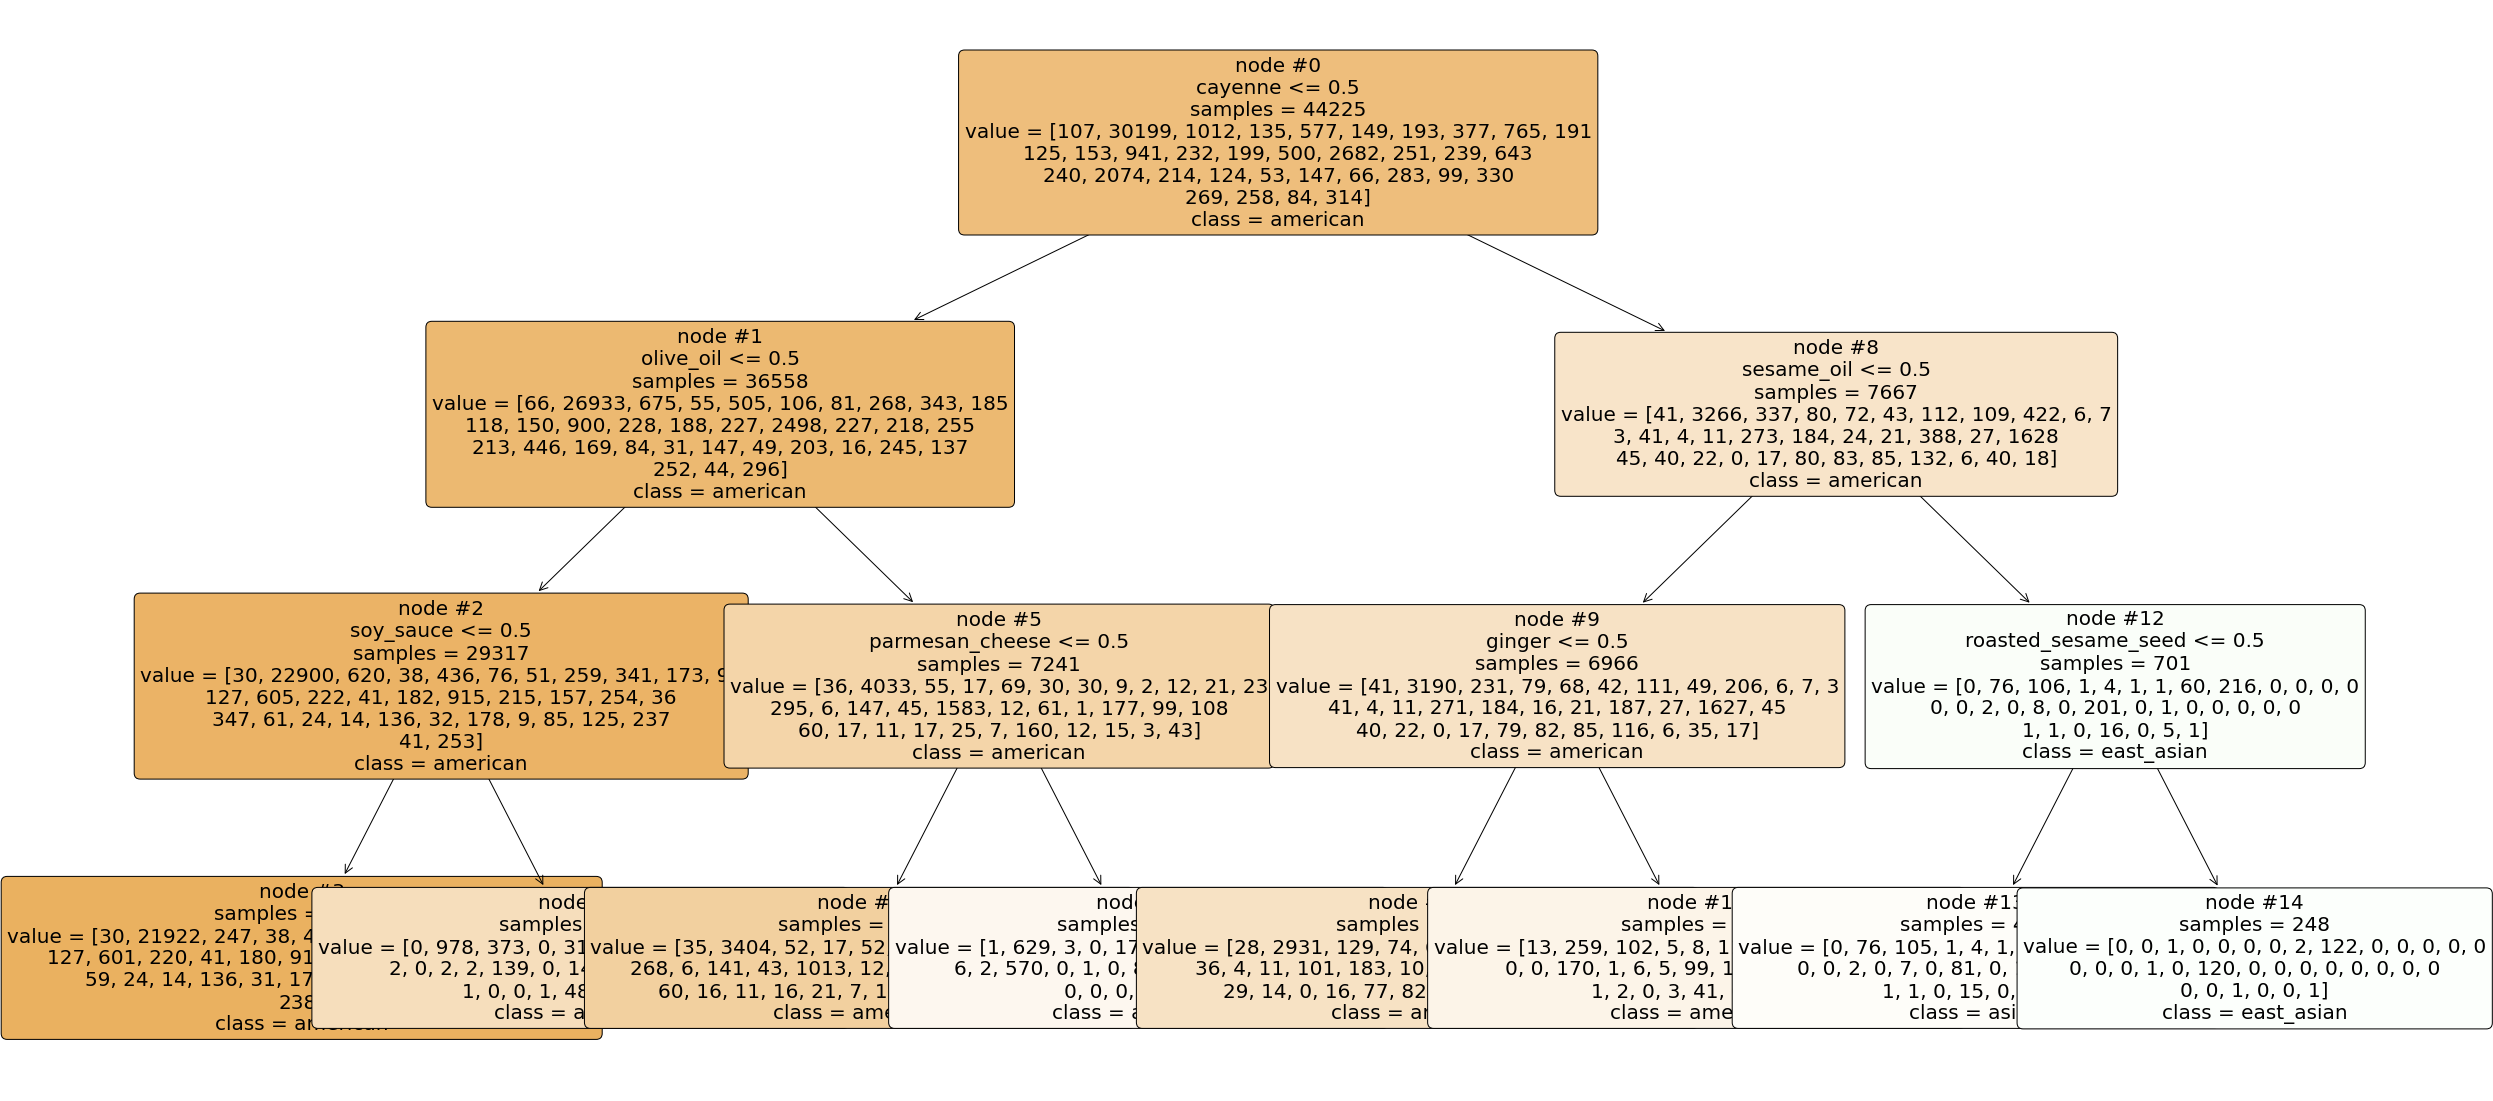

In [319]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(food_tree,
                   feature_names = list(X.columns.values),
                   class_names=np.unique(y),filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=20, rounded = True)
plt.show()